Code for plotting data related to Figure 3 and Extended Data Figure 4

In [1]:
library(Seurat)
library(Signac)
library(readr)
library(tidyr)
library(UpSetR)
library(ggvenn)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
library(GenomicRanges)
library(ggpubr)
library(tibble)
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(openxlsx)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(clusterProfiler)
library(org.Hs.eg.db)
library(rGREAT)
set.seed(1234)

Attaching SeuratObject

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union

In [2]:
load("/mnt/WORKHORSE/C9ALSFTLD_multiome/tables/snATAC_class_C9together_cutoff.rda")
load("/mnt/WORKHORSE/C9ALSFTLD_multiome/tables/snATAC_class_sALSnoFTLD_cutoff.rda")

#neuron_upset
table(C9ALS.cutoff.df$class_clusters)
table(sALS.cutoff.df$class_clusters)


      Astrocytes       Excitatory       Inhibitory        Micro-PVM 
              14              184               26               73 
Oligodendrocytes              OPC 
               4               32 


Astrocytes Excitatory Inhibitory  Micro-PVM        OPC 
        70        161         46         11         12 

In [3]:
C9ALS_Excitatory=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "Excitatory", ]
C9ALS_Excitatory$motif

sALS_Excitatory=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "Excitatory", ]
sALS_Excitatory$motif

C9ALS_Inhibitory=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "Inhibitory", ]
C9ALS_Inhibitory$motif

sALS_Inhibitory=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "Inhibitory", ]
sALS_Inhibitory$motif

neuron_upset<-list(C9ALS_Excitatory=C9ALS_Excitatory$motif,
                   sALS_Excitatory=sALS_Excitatory$motif,
                   C9ALS_Inhibitory=C9ALS_Inhibitory$motif,
                   sALS_Inhibitory=sALS_Inhibitory$motif)

[1] "ASCL1"   "BCL6"    "BCL6B"   "EBF1"    "EBF2"    "EBF3"    "EBF4"   
  [8] "ESR2"    "FEZF2"   "FOXG1"   "GFI1"    "GFI1B"   "GTF3A"   "HAND1"  
 [15] "HDX"     "IKZF3"   "INSM1"   "IRF1"    "IRF2"    "IRF3"    "IRF9"   
 [22] "KLF17"   "MECP2"   "MZF1"    "NFAT5"   "NFATC2"  "NFATC3"  "NFATC4" 
 [29] "NFKB1"   "NHLH1"   "NHLH2"   "OSR2"    "PPARA"   "PRDM5"   "PTF1A"  
 [36] "RBAK"    "RBPJL"   "REL"     "RELA"    "REST"    "RREB1"   "SMAD4"  
 [43] "SMAD9"   "SPZ1"    "STAT6"   "TCF7L2"  "TFAP2A"  "TFAP2B"  "TFAP2C" 
 [50] "TFAP2D"  "TFAP2E"  "VDR"     "VEZF1"   "ZBTB48"  "ZBTB6"   "ZFP28"  
 [57] "ZFP41"   "ZFP69"   "ZFP69B"  "ZIC2"    "ZIC3"    "ZIM3"    "ZKSCAN2"
 [64] "ZKSCAN5" "ZNF10"   "ZNF101"  "ZNF124"  "ZNF134"  "ZNF16"   "ZNF17"  
 [71] "ZNF18"   "ZNF184"  "ZNF189"  "ZNF19"   "ZNF197"  "ZNF212"  "ZNF25"  
 [78] "ZNF257"  "ZNF260"  "ZNF263"  "ZNF266"  "ZNF28"   "ZNF282"  "ZNF300" 
 [85] "ZNF322"  "ZNF324B" "ZNF329"  "ZNF331"  "ZNF335"  "ZNF34"   "ZNF350" 
 [92] "ZNF354C" "ZNF37A"  "ZNF384"  "ZNF394"  "ZNF398"  "ZNF41"   "ZNF415" 
 [99] "ZNF418"  "ZNF419"  "ZNF430"  "ZNF431"  "ZNF436"  "ZNF44"   "ZNF442" 
[106] "ZNF45"   "ZNF479"  "ZNF480"  "ZNF483"  "ZNF484"  "ZNF490"  "ZNF492" 
[113] "ZNF502"  "ZNF506"  "ZNF513"  "ZNF527"  "ZNF528"  "ZNF530"  "ZNF534" 
[120] "ZNF549"  "ZNF550"  "ZNF555"  "ZNF561"  "ZNF563"  "ZNF570"  "ZNF573" 
[127] "ZNF580"  "ZNF586"  "ZNF594"  "ZNF596"  "ZNF605"  "ZNF616"  "ZNF619" 
[134] "ZNF621"  "ZNF626"  "ZNF641"  "ZNF662"  "ZNF674"  "ZNF675"  "ZNF677" 
[141] "ZNF680"  "ZNF695"  "ZNF701"  "ZNF707"  "ZNF708"  "ZNF71"   "ZNF713" 
[148] "ZNF714"  "ZNF730"  "ZNF736"  "ZNF749"  "ZNF75A"  "ZNF75D"  "ZNF764" 
[155] "ZNF768"  "ZNF780A" "ZNF785"  "ZNF786"  "ZNF790"  "ZNF793"  "ZNF805" 
[162] "ZNF816"  "ZNF821"  "ZNF823"  "ZNF84"   "ZNF860"  "ZNF891"  "ZNF93"  
[169] "ZSCAN1"  "ZSCAN16" "ZSCAN4"  "ASCL2"   "ZBTB18"  "TCF12"   "ZBTB42" 
[176] "ZEB2"    "HAND2"   "TBX1"    "TBX10"   "LYL1"    "SNAI1"   "TCF4"   
[183] "SNAI3"   "MESP1"

[1] "ZNF24"   "ZNF704"  "VEZF1"   "HBP1"    "ZIC3"    "MECP2"   "ZNF454" 
  [8] "ZIC5"    "SOX1"    "ZNF816"  "ZNF674"  "ZNF141"  "ZNF460"  "MBD2"   
 [15] "ZNF610"  "ZNF594"  "ZNF28"   "ZNF398"  "ZNF10"   "TFAP2E"  "ZIC1"   
 [22] "IKZF3"   "MZF1"    "ZNF619"  "ZNF776"  "ZNF534"  "MTF2"    "ZBTB12" 
 [29] "DNMT1"   "ZNF528"  "ZNF2"    "ZNF3"    "INSM1"   "ZNF783"  "GTF3A"  
 [36] "ZNF101"  "ZNF124"  "ZNF197"  "ZNF260"  "ZBTB7B"  "SPZ1"    "ZSCAN1" 
 [43] "ZNF662"  "ZNF212"  "ZNF768"  "TFAP2A"  "RBAK"    "E2F6"    "ZNF527" 
 [50] "HDX"     "ZNF582"  "ZNF749"  "ZNF580"  "ZSCAN4"  "ZNF513"  "TFAP2B" 
 [57] "ZNF282"  "ZNF621"  "GFI1"    "ZNF45"   "ZNF561"  "GLIS2"   "ZNF84"  
 [64] "ZNF555"  "ZNF563"  "ZNF93"   "SMAD4"   "TCF7L2"  "ZNF431"  "ZNF605" 
 [71] "ZNF16"   "ZNF675"  "ZNF335"  "STAT6"   "MEIS1"   "ZNF652"  "ZNF891" 
 [78] "ZNF695"  "EBF1"    "ZNF317"  "ZNF707"  "ZNF350"  "ZNF736"  "ZNF436" 
 [85] "EBF2"    "EBF3"    "EBF4"    "IRF3"    "ZNF41"   "ZNF823"  "HINFP"  
 [92] "SMAD9"   "ZNF479"  "REL"     "ZNF549"  "RELA"    "PBX2"    "ZFP41"  
 [99] "ZNF415"  "FOXG1"   "NR4A3"   "ZNF821"  "ZNF34"   "ZNF75D"  "IRF7"   
[106] "LIN54"   "ZNF616"  "PTF1A"   "ZNF189"  "ZNF257"  "HAND1"   "ZNF71"  
[113] "KLF8"    "RELB"    "ZNF394"  "PKNOX2"  "ZBTB44"  "ZNF730"  "ZNF490" 
[120] "ZIM3"    "ZNF184"  "PKNOX1"  "ZNF300"  "ZNF785"  "ZBTB6"   "ZNF620" 
[127] "KLF17"   "ZNF33B"  "ZNF680"  "ZNF480"  "ZZZ3"    "TGIF1"   "ZNF681" 
[134] "ZKSCAN5" "GFI1B"   "NFATC3"  "ZNF641"  "MAFK"    "NFE2L1"  "POU3F2" 
[141] "MESP2"   "LYL1"    "MSGN1"   "OLIG3"   "NEUROG1" "NEUROG2" "NEUROD2"
[148] "NEUROG3" "BHLHE22" "NEUROD1" "NEUROD4" "NEUROD6" "NFE2L3"  "OLIG1"  
[155] "TWIST2"  "BHLHE23" "OLIG2"   "BHLHA15" "NFE2L2"  "ATOH7"   "BACH2"

[1] "MECP2"  "ZNF704" "ZNF783" "MBD2"   "ZNF610" "ZNF594" "DNMT1"  "ZBTB12"
 [9] "ZNF2"   "FOXG1"  "ZBTB7B" "ZSCAN1" "ZNF260" "ZSCAN4" "HDX"    "ZNF652"
[17] "ZNF785" "ZNF561" "GFI1"   "ZNF513" "TCFL5"  "ZNF483" "ZNF490" "ASCL2" 
[25] "ASCL1"  "TCF12"

[1] "ZNF704" "MECP2"  "ZNF454" "MBD2"   "ZNF2"   "ZNF783" "ZNF610" "ZBTB7B"
 [9] "ZBTB12" "DNMT1"  "HINFP"  "MTF2"   "ZNF460" "ZIC5"   "ZIC3"   "ZNF674"
[17] "CTCFL"  "TFDP1"  "TFDP2"  "TFDP3"  "VEZF1"  "TCFL5"  "ZNF486" "ZNF846"
[25] "LIN28A" "ZIC1"   "ZBTB7A" "E2F4"   "CTCF"   "ZNF594" "LIN28B" "ZNF501"
[33] "ZFP57"  "ZNF652" "ZBTB14" "ZNF417" "NRF1"   "ZBTB1"  "HBP1"   "ZSCAN1"
[41] "ZSCAN4" "FOXG1"  "ZNF24"  "SOX1"   "BACH1"  "BACH2"

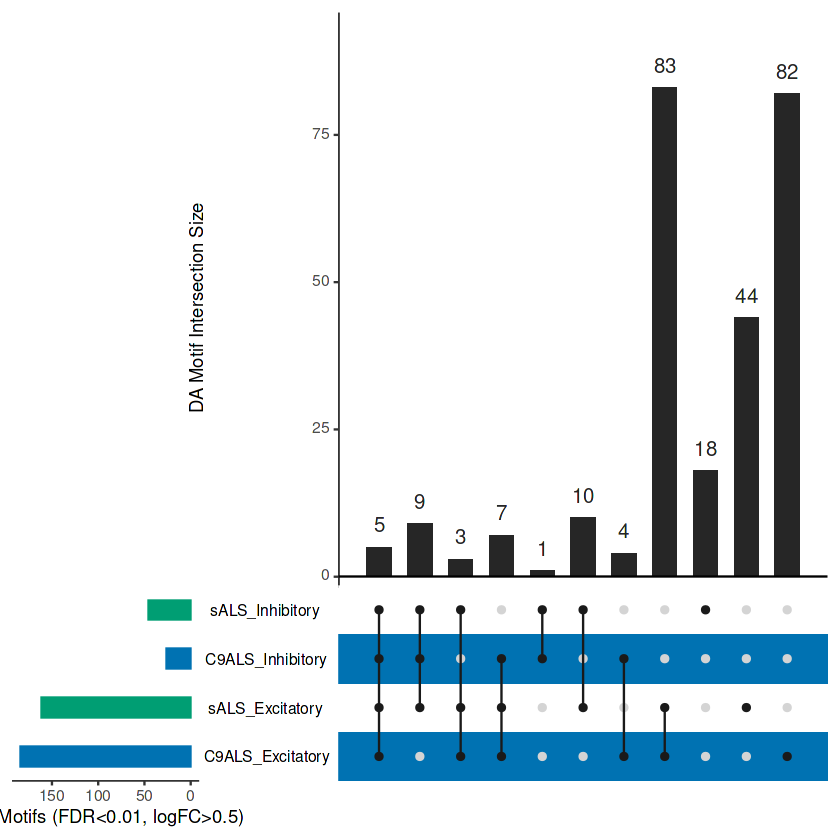

In [4]:
upset(fromList(neuron_upset),group.by="degree",order.by="degree",sets=c("C9ALS_Excitatory", "sALS_Excitatory", "C9ALS_Inhibitory","sALS_Inhibitory"),
      sets.bar.color=c("sALS_Excitatory"="#0072B2","C9ALS_Excitatory"="#009E73", "sALS_Inhibitory"="#0072B2","C9ALS_Inhibitory"="#009E73"),
      number.angles=0,point.size=2, line.size=0.5, text.scale=c(1.3,1.3,1.3,1.3,1.3),keep.order=T,
      main.bar.color="gray15", 
      matrix.color=c("gray10"), matrix.dot.alpha=1.5,
      shade.color=c("#0072B2","#0072B2"), shade.alpha = 1,
      mainbar.y.label = "DA Motif Intersection Size",
      sets.x.label = "DA Motifs (FDR<0.01, logFC>0.5)")

In [5]:
# Glia Motif Upset Plots

C9ALS_Oligodendrocytes=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "Oligodendrocytes", ]
C9ALS_Oligodendrocytes$motif
sALS_Oligodendrocytes=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "Oligodendrocytes", ]
sALS_Oligodendrocytes$motif
C9ALS_OPC=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "OPC", ]
C9ALS_OPC$motif
sALS_OPC=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "OPC", ]
sALS_OPC$motif

C9ALS_Astrocytes=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "Astrocytes", ]
C9ALS_Astrocytes$motif
sALS_Astrocytes=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "Astrocytes", ]
sALS_Astrocytes$motif
C9ALS_MicroPVM=C9ALS.cutoff.df[C9ALS.cutoff.df$class_clusters == "Micro-PVM", ]
C9ALS_MicroPVM$motif
sALS_MicroPVM=sALS.cutoff.df[sALS.cutoff.df$class_clusters == "Micro-PVM", ]
sALS_MicroPVM$motif

glia_upset<-list(C9ALS_Oligodendrocytes=C9ALS_Oligodendrocytes$motif,
                 sALS_Oligodendrocytes=sALS_Oligodendrocytes$motif,
                 C9ALS_OPC=C9ALS_OPC$motif,
                 sALS_OPC=sALS_OPC$motif,
                 C9ALS_Astrocytes=C9ALS_Astrocytes$motif,
                 sALS_Astrocytes=sALS_Astrocytes$motif,
                 C9ALS_MicroPVM=C9ALS_MicroPVM$motif,
                 sALS_MicroPVM=sALS_MicroPVM$motif
)

[1] "MITF" "TFE3" "USF1" "USF2"

character(0)

[1] "STAT3"   "STAT4"   "IRF3"    "MAFF"    "MAFG"    "STAT1"   "ZNF492" 
 [8] "STAT5B"  "VEZF1"   "MAFB"    "ZNF71"   "IRF2"    "FEZF2"   "FOXG1"  
[15] "FOXI2"   "FOXI3"   "FOXL1"   "FOXO4"   "IRF7"    "RELA"    "FOXP1"  
[22] "IRF9"    "IRF1"    "ZNF350"  "ZKSCAN2" "FOXP2"   "IRF8"    "FEZF1"  
[29] "IRF4"    "NFIB"    "NFIX"    "NFIC"

[1] "NRF1"   "ZNF704" "IRF3"   "ZNF454" "STAT3"  "ZNF783" "MTF2"   "HINFP" 
 [9] "MBD2"   "MECP2"  "NFIX"   "NFIB"

[1] "STAT3"  "STAT1"  "STAT4"  "STAT5A" "BACH2"  "BACH1"  "STAT5B" "NFE2L3"
 [9] "NFE2L2" "NFIB"   "NFIA"   "NFIC"   "NFIX"   "MAFK"

[1] "ZFHX2"  "SEBOX"  "ARX"    "PAX4"   "TLX2"   "PBX4"   "EMX1"   "LHX8"  
 [9] "ISX"    "NFIB"   "LHX2"   "GSX1"   "NFIA"   "UNCX"   "POU6F2" "ZFHX3" 
[17] "DBX1"   "OTP"    "NKX62"  "ALX3"   "ALX4"   "PHOX2A" "VAX1"   "LHX9"  
[25] "ARGFX"  "LHX6"   "DBX2"   "HLX"    "HOXC5"  "PRRX1"  "SHOX"   "STAT3" 
[33] "HOXB3"  "MAFK"   "LMX1A"  "LHX4"   "LHX5"   "NOBOX"  "VSX1"   "SKOR1" 
[41] "STAT1"  "NFIX"   "LBX2"   "LBX1"   "EMX2"   "EVX1"   "EVX2"   "MNX1"  
[49] "VAX2"   "VSX2"   "PRRX2"  "RAX2"   "SHOX2"  "SKOR2"  "GBX1"   "EN1"   
[57] "EN2"    "GBX2"   "NOTO"   "NFIC"   "HOXA2"  "STAT4"  "HOXB2"  "NKX12" 
[65] "LMX1B"  "LHX3"   "STAT5A" "MSX2"   "NKX11"  "STAT5B"

[1] "CEBPB"   "CEBPA"   "CEBPD"   "CEBPG"   "CEBPE"   "BACH1"   "STAT3"  
 [8] "BACH2"   "RUNX1"   "NFE2L2"  "DDIT3"   "STAT1"   "FOSL1"   "RUNX3"  
[15] "ZNF41"   "ZNF84"   "TFEC"    "MITF"    "USF1"    "USF2"    "ZNF713" 
[22] "ZFP28"   "ZNF613"  "TFE3"    "JUNB"    "NR2C2"   "ZNF225"  "ZNF677" 
[29] "ZNF492"  "FOSL2"   "ZNF98"   "ELK4"    "ZNF22"   "ZKSCAN5" "PRDM6"  
[36] "FLI1"    "ETV2"    "ELF3"    "ERG"     "ZNF182"  "ERF"     "ETS1"   
[43] "BPTF"    "ZNF487"  "ETV3L"   "ZNF567"  "ZNF235"  "ETV1"    "ETV4"   
[50] "ZNF287"  "ZNF695"  "IRF7"    "GABPA"   "SPIC"    "SPIB"    "ELF4"   
[57] "IRF9"    "SPI1"    "EHF"     "ETV6"    "IRF5"    "ELF2"    "ELF5"   
[64] "ELF1"    "IRF4"    "STAT2"   "IRF8"    "ELK1"    "IRF1"    "IRF2"   
[71] "FEV"     "IRF3"    "ZNF71"

[1] "ZNF713" "ZNF22"  "BPTF"   "ZNF613" "ZNF98"  "ZNF492" "ZNF182" "CEBPD" 
 [9] "CEBPG"  "CEBPB"  "ELK4"

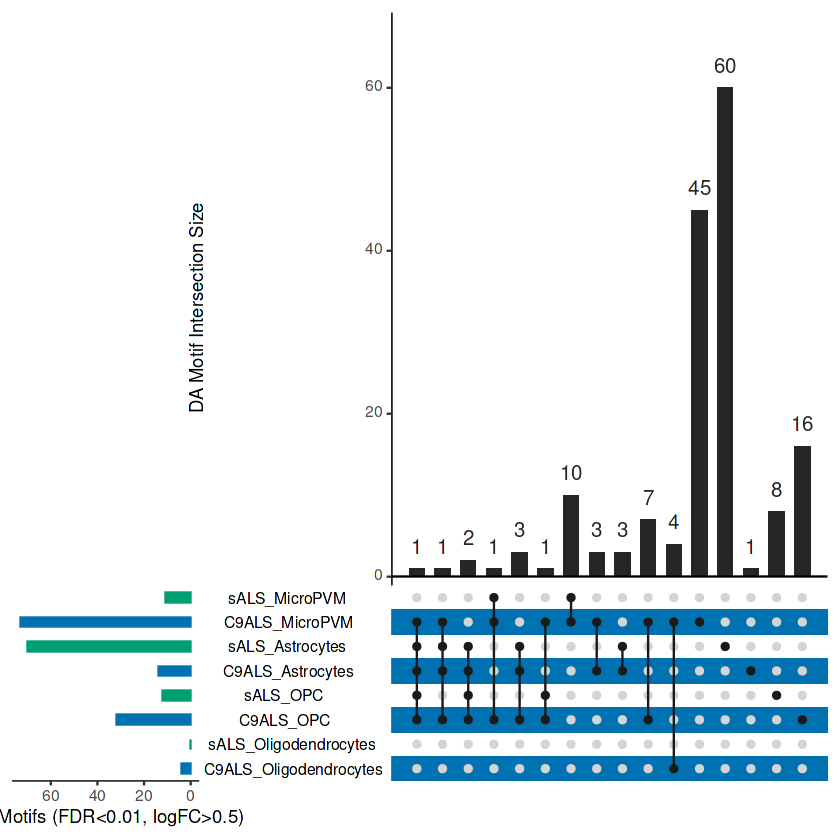

In [6]:
upset(fromList(glia_upset),group.by="degree",order.by="degree",
      sets=c("C9ALS_Oligodendrocytes", "sALS_Oligodendrocytes", "C9ALS_OPC","sALS_OPC", "C9ALS_Astrocytes","sALS_Astrocytes", "C9ALS_MicroPVM","sALS_MicroPVM"),
      sets.bar.color=c("sALS_Oligodendrocytes"="#0072B2","C9ALS_Oligodendrocytes"="#009E73", 
                       "sALS_OPC"="#0072B2","C9ALS_OPC"="#009E73",
                       "sALS_Astrocytes"="#0072B2","C9ALS_Astrocytes"="#009E73",
                       "sALS_MicroPVM"="#0072B2","C9ALS_MicroPVM"="#009E73"
      ),
      number.angles=0,point.size=2, line.size=0.5, text.scale=c(1.3,1.3,1.3,1.3,1.3),keep.order=T,
      main.bar.color="gray15", 
      matrix.color=c("gray10"), matrix.dot.alpha=1.5,
      shade.color=c("#0072B2","#0072B2"), shade.alpha = 1,
      mainbar.y.label = "DA Motif Intersection Size",
      sets.x.label = "DA Motifs (FDR<0.01, logFC>0.5)")

Code for annotating peaks

In [7]:
#load object (this case example will be inhibitory neurons)
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene
snATAC_inh <- readRDS(file="/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snATAC/snATAC_inhibitory.RDS")

diagnosis_colors <- c("#E69F00","#009E73","#0072B2")
class_colors <- c("#EE6677","#228833","#4477AA","#66CCEE","#AA3377","#BBBBBB")

Idents(snATAC_inh) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snATAC_inh)
snATAC_inh <- RenameIdents(snATAC_inh, diagnoses)
snATAC_inh$diagnoses <- Idents(snATAC_inh)

promoter <- getPromoters(TxDb=txdb, upstream=3000, downstream=3000)

plot.diagnoses <- rev(c("control", "C9ALS", "sALS"))
snATAC_inh$diagnoses <- factor(snATAC_inh$diagnoses, levels = plot.diagnoses)
DefaultAssay(snATAC_inh) <- "ATAC"
Idents(snATAC_inh) <- "diagnoses"
idents <- c("C9ALS", "sALS")

In [8]:
#load DAR results
load("/mnt/WORKHORSE/C9ALSFTLD_multiome/tables/ATAC_class_LR/snATAC_class_sALSnoFTLD_LR.rda")
load("/mnt/WORKHORSE/C9ALSFTLD_multiome/tables/ATAC_class_LR/snATAC_class_C9together_LR.rda")

#create dataframe from DAR results

inh_df <- data.frame()
C9ALS_ATAC_LR<-class.C9together.LR[class.C9together.LR$class_clusters == "Inhibitory",]
C9ALS_ATAC_LR$diagnosis <- "C9ALS"
sALS_ATAC_LR<-snATAC_class_sALSnoFTLD_LR[snATAC_class_sALSnoFTLD_LR$class_clusters == "Inhibitory",]
sALS_ATAC_LR$diagnosis <- "sALS"
inh_df<-rbind(C9ALS_ATAC_LR, sALS_ATAC_LR)
inh_df <- inh_df[,-c(6:9,11:13)]

#annotate DAR dataframe
cf <- ClosestFeature(snATAC_inh, regions = inh_df$query_region)
current_colnames <- colnames(inh_df)
remaining_colnames <- setdiff(current_colnames, c("query_region", "diagnosis"))
new_order <- c("query_region", "diagnosis", remaining_colnames)
inh_df <- inh_df[, new_order]
inh_df <- cbind(inh_df, gene=cf$gene_name, gene_biotype = cf$gene_biotype, type = cf$type, distance=cf$distance, genomeRegion=cf$query_region)
inh_df$genomeRegion <- NULL
colnames(inh_df)[1] <- c("genomeRegion")

In [9]:
# combine p-value with fold change for ranking DAR changes
Combined.P.FC <- function(data, logFC = T, log10P = T, min.p = 0.00001){
    data <- na.omit(data)
    if(logFC){
        LFC <- abs(data[,1])
    }else{
        LFC <- abs(log2(as.numeric(data[,1])))
    }
    data.pro <- data[which(data[,2]>0),]
    min.value <- min(data.pro[,2])
    if(min.value < min.p){
        min.value <- min.value*0.1
    }else{
        min.value <- min.p
    }

    index <- which(data[,2]==0)
    data[index,2] <- min.value

    if(log10P){
        LP <- data[,2]
    }else{
        LP <- -log10(as.numeric(data[,2]))
    }

    pi <- LFC*LP
    data$pi <- pi
    return(data)
}

pi <- Combined.P.FC(inh_df[,c("avg_log2FC", "p_val_adj")], log10P = F)
inh_df$pi <- pi$pi

In [10]:
## 
#require avg_log2FC.threshold = 0.5 & p_val_adj < 0.01
inh.sig.pos.DARs <- inh_df %>% filter(avg_log2FC >=0.25 & p_val_adj < 0.01) %>% arrange(desc(pi))
inh.sig.pos.gr <- StringToGRanges(unique(inh.sig.pos.DARs$genomeRegion))

DAR.Anno <- annotatePeak(inh.sig.pos.gr, tssRegion=c(-3000, 3000), TxDb = txdb, annoDb="org.Hs.eg.db")

idents <- unique(inh.sig.pos.DARs$diagnosis)
inh.gr.list <- lapply(idents, function(x){
  idx <- which(inh.sig.pos.DARs$diagnosis == x)
  gr <- StringToGRanges(inh.sig.pos.DARs$genomeRegion[idx])
})
names(inh.gr.list) <- idents

DAR.anno.list <- lapply(inh.gr.list, function(x){
  DAR.cell <- annotatePeak(x, tssRegion=c(-3000, 3000), TxDb = txdb, annoDb="org.Hs.eg.db")
  return(DAR.cell)
})

>> preparing features information...		 2024-01-24 12:11:20 PM 
>> identifying nearest features...		 2024-01-24 12:11:21 PM 
>> calculating distance from peak to TSS...	 2024-01-24 12:11:21 PM 
>> assigning genomic annotation...		 2024-01-24 12:11:21 PM 
>> adding gene annotation...			 2024-01-24 12:11:43 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-24 12:11:44 PM 
>> done...					 2024-01-24 12:11:44 PM 
>> preparing features information...		 2024-01-24 12:11:44 PM 
>> identifying nearest features...		 2024-01-24 12:11:44 PM 
>> calculating distance from peak to TSS...	 2024-01-24 12:11:44 PM 
>> assigning genomic annotation...		 2024-01-24 12:11:44 PM 
>> adding gene annotation...			 2024-01-24 12:11:48 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-24 12:11:48 PM 
>> done...					 2024-01-24 12:11:48 PM 
>> preparing features information...		 2024-01-24 12:11:48 PM 
>> identifying nearest features...		 2024-01-24 12:11:48 PM 
>> calculating distance from peak to TSS...	 2024-01-24 12:11:48 PM 
>> assigning genomic annotation...		 2024-01-24 12:11:48 PM 
>> adding gene annotation...			 2024-01-24 12:11:52 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2024-01-24 12:11:52 PM 
>> done...					 2024-01-24 12:11:52 PM 


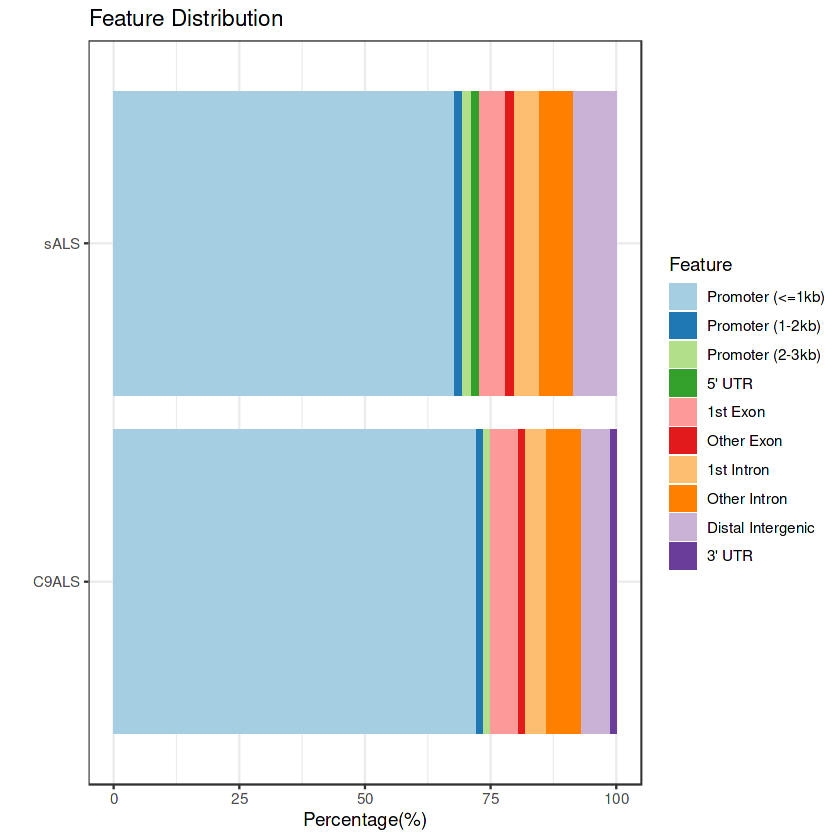

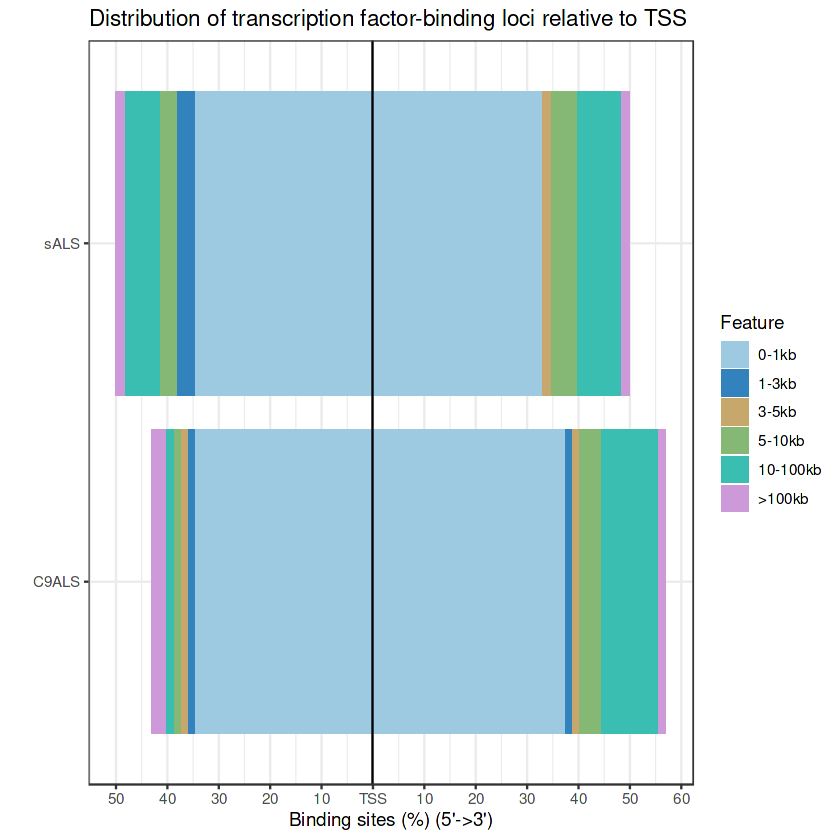

In [11]:
#Annotated peaks and distance of TF motifs from transcriptional start site (TF) for inhibitory neurons in DARs from C9-ALS and sALS vs. control
plotAnnoBar(DAR.anno.list)
plotDistToTSS(DAR.anno.list)

In [15]:
# Calculate Footprint Plots for inhibitory neurons
library(BSgenome.Hsapiens.UCSC.hg38)
DefaultAssay(snATAC_inh) <- "ATAC"

#re-attach fragment objects
fragments <- CreateFragmentObject(path="/mnt/WORKHORSE/C9ALSFTLD_multiome/fragments/fragments1.tsv.gz", cells=colnames(snATAC_inh))
Fragments(snATAC_inh) <- NULL
Fragments(snATAC_inh) <- fragments

snATAC_inh <- Footprint(
  object = snATAC_inh,
  motif.name = c("FOXG1", "TCFL5"),
  genome = BSgenome.Hsapiens.UCSC.hg38
)

Computing hash



Computing Tn5 insertion bias

Extracting reads in requested region

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites



Warning message:
"Removed 1533 rows containing missing values (`geom_label_repel()`)."


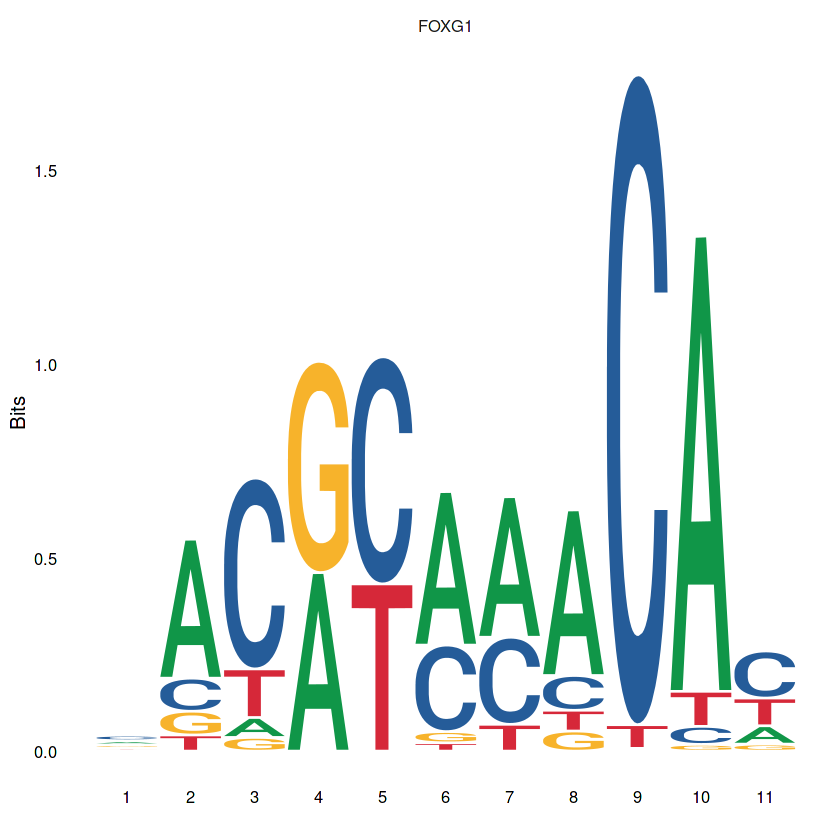

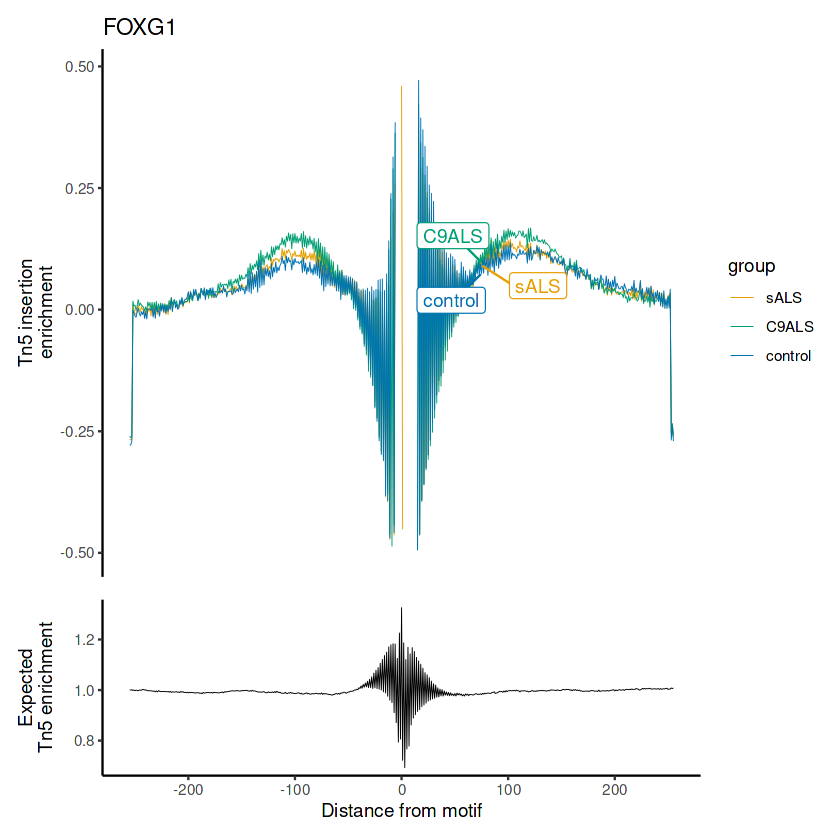

Warning message:
"Removed 1530 rows containing missing values (`geom_label_repel()`)."


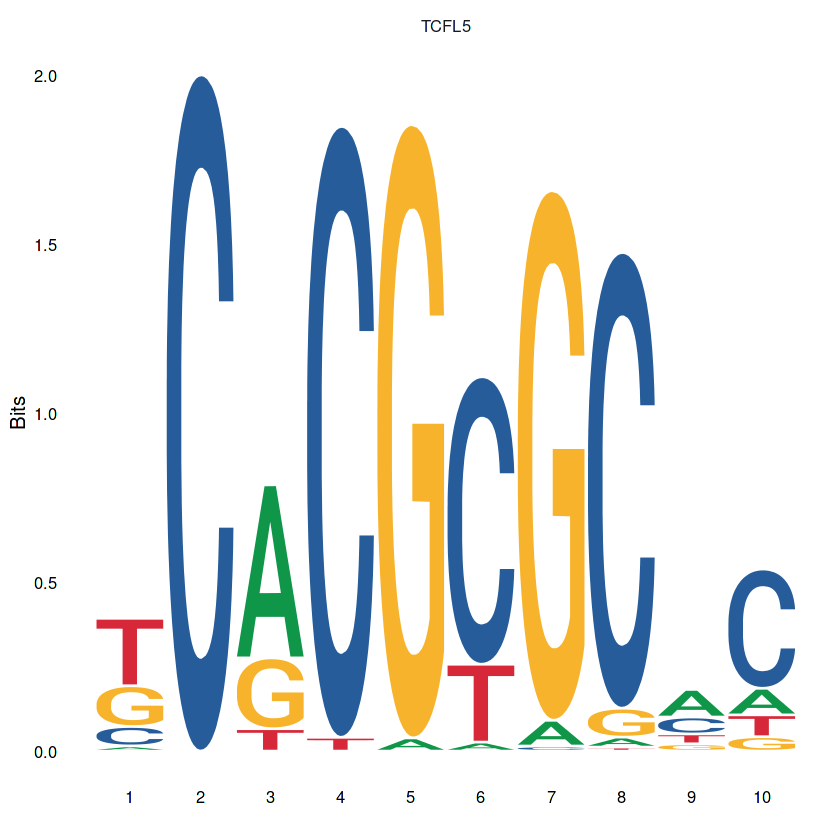

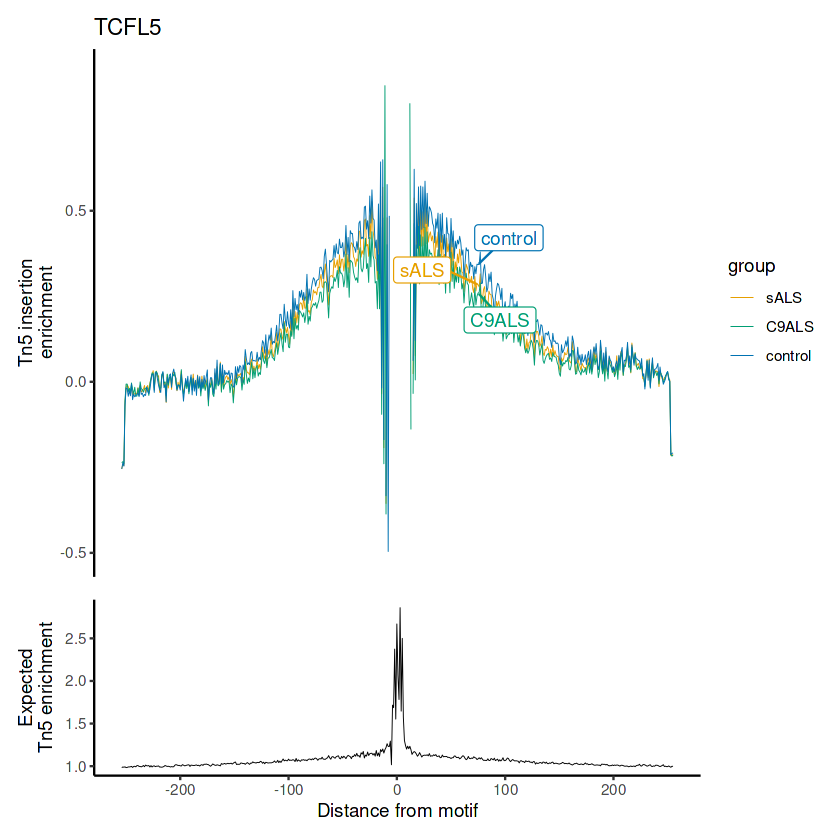

In [18]:
#Motif Plots and footprints
MotifPlot(
  object = snATAC_inh,
  motifs = "FOXG1",
  assay = 'ATAC')

PlotFootprint(snATAC_inh, features = "FOXG1", 
              idents = c("control", "C9ALS", "sALS")
             ) &scale_colour_manual(values=c("#E69F00","#009E73","#0072B2"))

MotifPlot(
  object = snATAC_inh,
  motifs = "TCFL5",
  assay = 'ATAC')

PlotFootprint(snATAC_inh, features = "TCFL5", 
              idents = c("control", "C9ALS", "sALS")
             ) &scale_colour_manual(values=c("#E69F00","#009E73","#0072B2"))